### How are in demand skills trending for data analyst? 

Methology

1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand


<!-- ### How are in demand skills trending for Data Analyst -->

In [1]:
#importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset
# Load the dataset
dataset=load_dataset("lukebarousse/data_jobs")
df= pd.DataFrame(dataset['train'])
#creating a copy of the original dataset so it stays uneffected
df1=df.copy()
#datetime filtering 
df1['job_posted_date']=pd.to_datetime(df1['job_posted_date'])
#seperating the month
df1['month']=df1['job_posted_date'].dt.month
#writing a function to convert the job_skills column from strings to lists
def clean_list(job_skills):
    if pd.notna(job_skills):
        return ast.literal_eval(job_skills)
    else:
        return job_skills
    
df1['job_skills']=df1['job_skills'].apply(clean_list)

In [203]:
#exploding the df to get the individual skills
df1_exploded= df1.explode('job_skills')

In [204]:
#lets get the top3 roles first and then we seperate based upon them 
top3=df1['job_title_short'].value_counts().head(3).index.to_list().copy() #using df1 for faster computation
top3

['Data Analyst', 'Data Engineer', 'Data Scientist']

In [51]:
#as seen by the result above : DA, DS, DE are the top 3 data roles

In [205]:
#creating 3 seperate dataframes for each role

#data analyst
df_da=df1_exploded[df1_exploded['job_title_short']=='Data Analyst']

#data engineer
df_de=df1_exploded[df1_exploded['job_title_short']=='Data Engineer']

#data scientist
df_ds=df1_exploded[df1_exploded['job_title_short']=='Data Scientist']


In [206]:
#using pivot table to get the skills and the months

#data analyst
df_da_skills=df_da['job_skills'].value_counts().head() #top 5 skills for data analyst
df_da_pivot=df_da.pivot_table(index='month', columns='job_skills', aggfunc='size') #pivot table

#data scientist
df_ds_skills=df_ds['job_skills'].value_counts().head() #top 5 skills for data scientist
df_ds_pivot=df_ds.pivot_table(index='month', columns='job_skills', aggfunc='size') #pivot table

#data engineer
df_de_skills=df_de['job_skills'].value_counts().head() #top 5 skills for data engineer
df_de_pivot=df_de.pivot_table(index='month', columns='job_skills', aggfunc='size') #pivot table

In [207]:
#filtering the pivot table
#data analyst
df_da_pivot=df_da_pivot[df_da_skills.index.to_list()] 
#data scientist
df_ds_pivot=df_ds_pivot[df_ds_skills.index.to_list()] 
#data engineer
df_de_pivot=df_de_pivot[df_de_skills.index.to_list()]

In [208]:
#for a smoother work flow
df_da_pivot = df_da_pivot.rename(columns={'job_skills': 'month'})
df_ds_pivot = df_ds_pivot.rename(columns={'job_skills': 'month'})
df_de_pivot = df_de_pivot.rename(columns={'job_skills': 'month'})

In [209]:
#adding the month name to the column- its just for better visualization
df_da_pivot['month_name']=['Jan', 'Feb', 'March', 'April','May','Jun','July','Aug','Sept','Oct','Nov','Dec']
df_ds_pivot['month_name']=['Jan', 'Feb', 'March', 'April','May','Jun','July','Aug','Sept','Oct','Nov','Dec']
df_de_pivot['month_name']=['Jan', 'Feb', 'March', 'April','May','Jun','July','Aug','Sept','Oct','Nov','Dec']

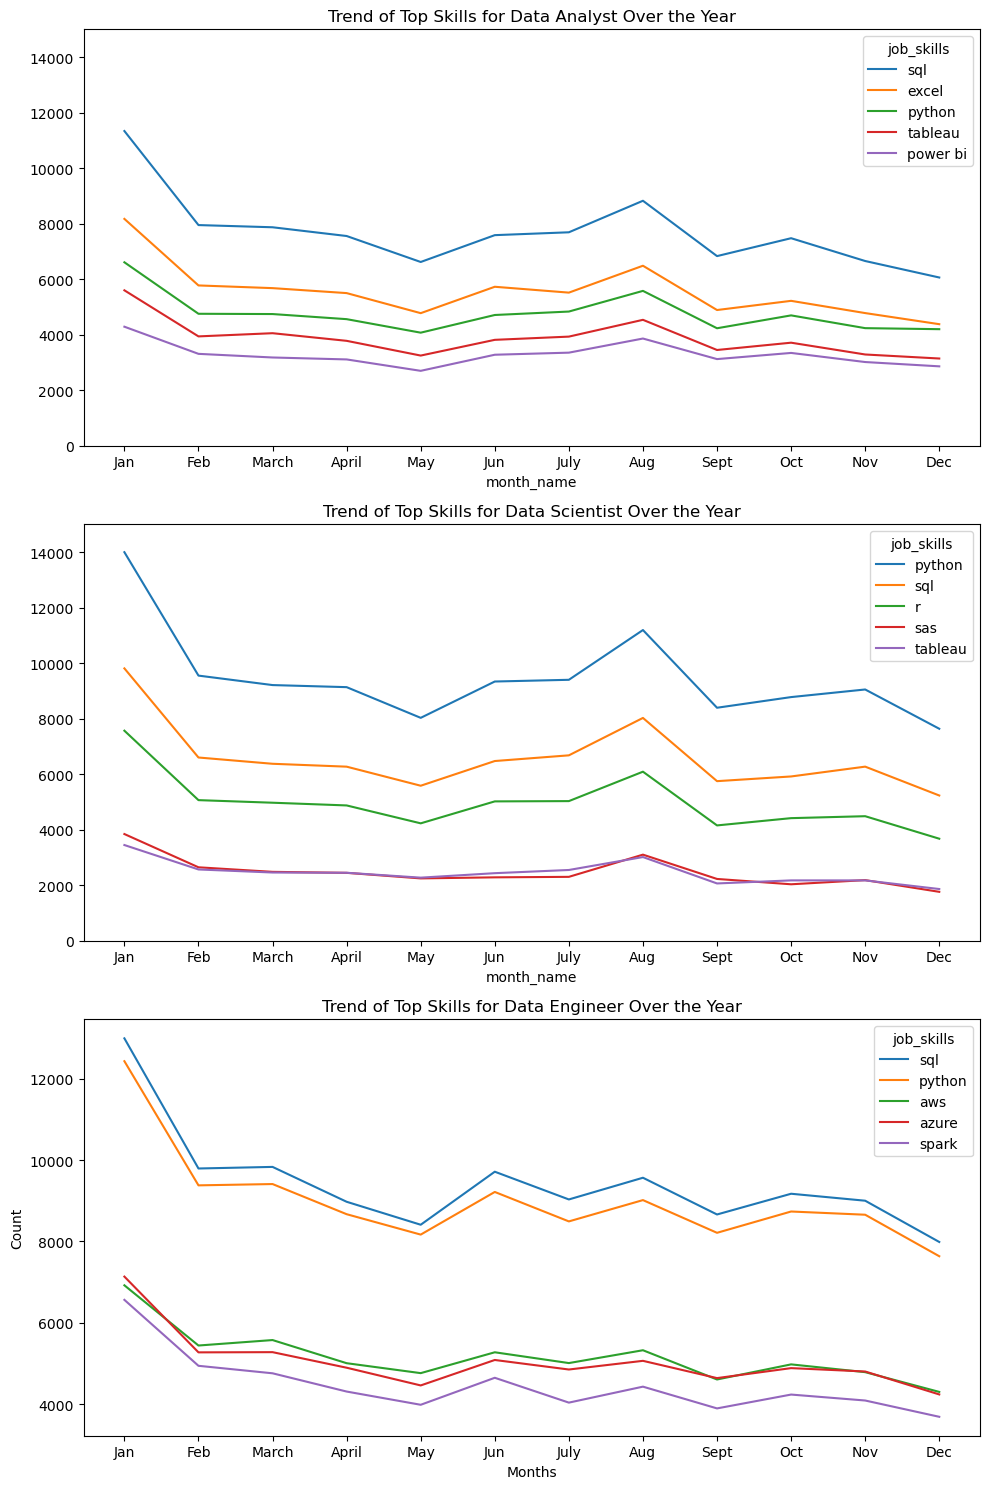

In [210]:
# creating subplots
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# plotting the data
sns.lineplot(data=df_da_pivot.set_index('month_name'), dashes=False, legend=True, ax=ax[0])
sns.lineplot(data=df_ds_pivot.set_index('month_name'), dashes=False, legend=True, ax=ax[1])
sns.lineplot(data=df_de_pivot.set_index('month_name'), dashes=False, legend=True, ax=ax[2])

#ax[0].set_xlabel('Months')
ax[0].set_ylim(0, 15_000)
ax[0].set_title("Trend of Top Skills for Data Analyst Over the Year")

#ax[1].set_xlabel('Months')
ax[1].set_ylim(0, 15_000)
ax[1].set_title("Trend of Top Skills for Data Scientist Over the Year")

ax[2].set_xlabel('Months')
ax[2].set_ylabel('Count')
ax[2].set_title("Trend of Top Skills for Data Engineer Over the Year")

plt.tight_layout()